<a href="https://colab.research.google.com/github/valimasoumeh/Big-Data/blob/main/CIFAR10%2BCNN%2BCALLBACK%2BROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50
782/782 [==============================] - 24s 13ms/step - loss: 1.5629 - accuracy: 0.4419 - val_loss: 1.5866 - val_accuracy: 0.4603 - lr: 0.0010
Epoch 2/50
  5/782 [..............................] - ETA: 10s - loss: 1.3483 - accuracy: 0.5656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 8s 11ms/step - loss: 1.1234 - accuracy: 0.6042 - val_loss: 0.9497 - val_accuracy: 0.6626 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 9s 11ms/step - loss: 0.9650 - accuracy: 0.6618 - val_loss: 0.9152 - val_accuracy: 0.6770 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 12s 15ms/step - loss: 0.8710 - accuracy: 0.6956 - val_loss: 1.1130 - val_accuracy: 0.6219 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 9s 12ms/step - loss: 0.8059 - accuracy: 0.7181 - val_loss: 0.8413 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 8s 11ms/step - loss: 0.7600 - accuracy: 0.7350 - val_loss: 0.9087 - val_accuracy: 0.7005 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 9s 11ms/step - loss: 0.7131 - accuracy: 0.7527 - val_loss: 0.7451 - val_accuracy: 0.7402 - lr: 0.0010
Epoch 8/50
782/782 [==============================] - 9s 12ms/step - loss:

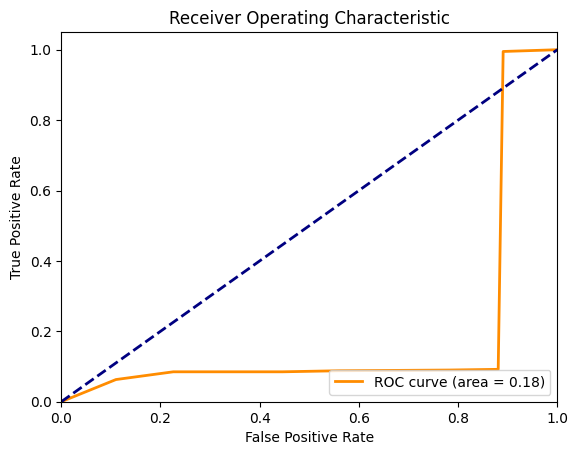

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks_list = [checkpoint, early_stopping, reduce_lr]

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=callbacks_list)

# Evaluate the model using ROC and AUC
y_pred = model.predict(x_test)
y_test_argmax = np.argmax(y_test, axis=1)
y_pred_argmax = np.argmax(y_pred, axis=1)

fpr, tpr, thresholds = roc_curve(y_test_argmax, y_pred_argmax, pos_label=1)
roc_auc = auc(fpr, tpr)

print('ROC AUC:', roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
